In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = '/content/coin_Bitcoin.csv'
data = pd.read_csv(url)

data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
# Display basic information about the dataset
data.info()

# Display summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

# **Exploratory Data Analysis (EDA):**
Visualizations:

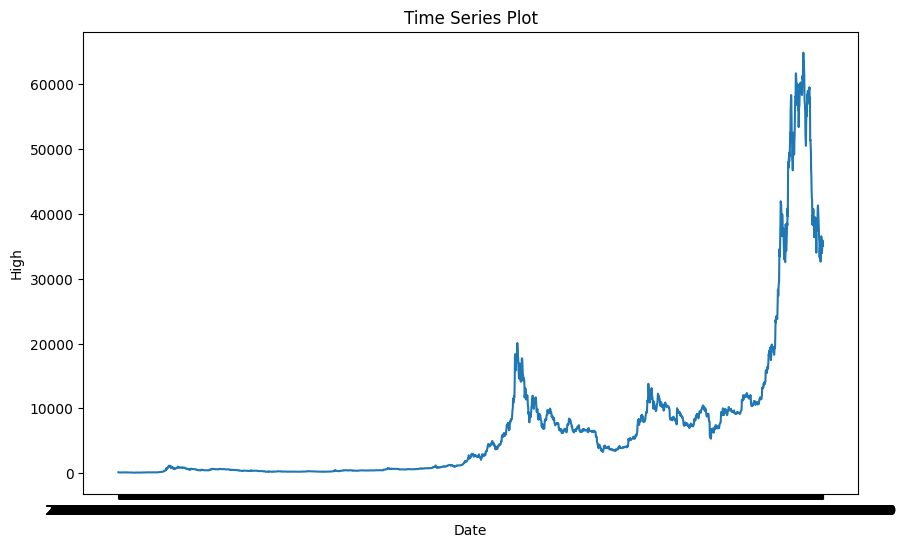

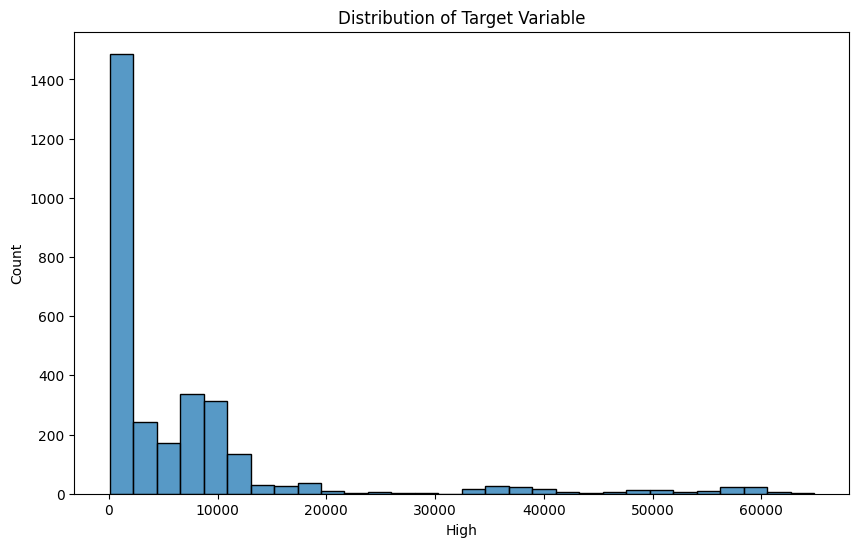

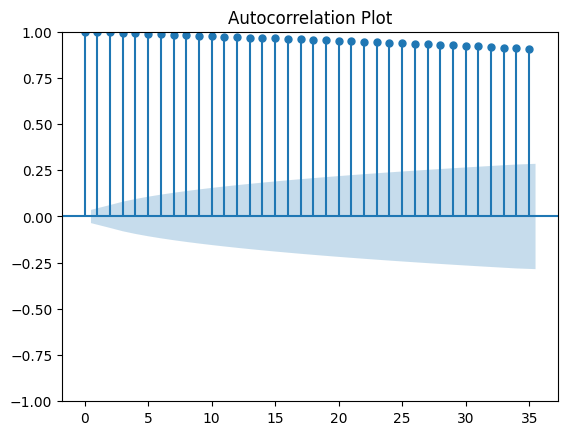

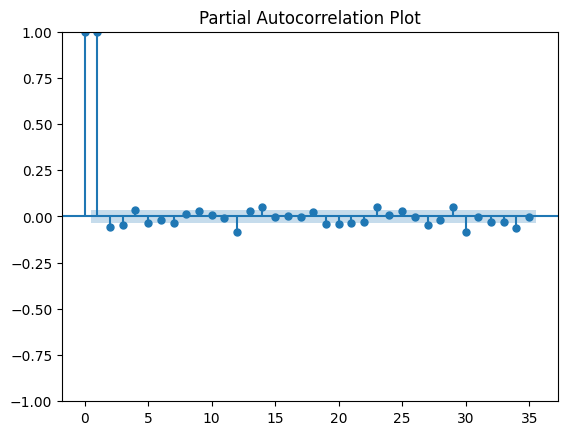

In [4]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series data
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['High'])  # Replace 'date_column' and 'target_column' with the actual column names
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

# Plot distribution of target variable
plt.figure(figsize=(10,6))
sns.histplot(data['High'], bins=30)  # Replace 'target_column' with the actual column name
plt.title('Distribution of Target Variable')
plt.show()

# Plot autocorrelation and partial autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['High'])  # Replace 'target_column' with the actual column name
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(data['High'])  # Replace 'target_column' with the actual column name
plt.title('Partial Autocorrelation Plot')
plt.show()


Statistical Analysis:

In [6]:
# Calculate and display summary statistics
print(data.describe())

# Check for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['High'])  # Replace 'target_column' with the actual column name
print('ADF Statistic:', result[0])
print('p-value:', result[1])


               SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1.499957e+11  
max    3.

# **Data Preprocessing and Cleaning:**
Handling Missing Values:

In [8]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
# For numerical features, you can fill missing values with mean, median, or mode
data['High'] = data['High'].fillna(data['High'].mean())

# For time series data, you can also use forward fill or backward fill
data['High'] = data['High'].fillna(method='ffill')


SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


# **Feature Engineering:**
Creating Time-Based Features:

In [10]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, day, and other time-based features
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['dayofweek'] = data['Date'].dt.dayofweek


In [11]:
# Create lag features to capture temporal dependencies
data['lag_1'] = data['High'].shift(1)
data['lag_2'] = data['High'].shift(2)


# **Machine Learning Modeling:**
Building Time Series Models

In [12]:
# Use time series models like ARIMA, SARIMA, or Prophet for modeling
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data for modeling
X = data['High'].dropna()  # Replace 'target_column' with the actual column name

# Fit an ARIMA model
model = ARIMA(X, order=(5,1,0))  # Replace (5,1,0) with the appropriate order parameters
fit_model = model.fit()

# Make predictions
y_pred = fit_model.forecast(steps=5)  # Replace '5' with the desired number of steps to forecast
print(y_pred)


2991    35057.384925
2992    35173.221622
2993    35101.845780
2994    35086.008748
2995    35082.027652
Name: predicted_mean, dtype: float64
